1. IMPORTING LIBRARIES

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline

2. DATA LOADING

In [111]:
df = pd.read_csv('data.csv')

In [112]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
1,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
2,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
3,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
4,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up


In [113]:
#setting option to maximun rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [114]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [115]:
print(f"The number of rows are {df.shape[0]},the number of columns are {df.shape[1]}.")

The number of rows are 10841,the number of columns are 13.


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


In [117]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [118]:
df.describe()

,Rating,Reviews
count,9367.000000,1.084100e+04
mean,4.191513,4.441119e+05
std,0.515735,2.927629e+06
min,1.000000,0.000000e+00
25%,4.000000,3.800000e+01
50%,4.300000,2.094000e+03
75%,4.500000,5.476800e+04
max,5.000000,7.815831e+07


But these are not the only 2 columns with numeric values. We also have 'Size', 'Installs' and 'Price' columns

In [119]:
df['Size'].unique()

array(['7.0M', '5.7M', '3.7M', '7.4M', '2.9M', '3.1M', '9.9M', '2.7M',
       '7.2M', '7.3M', '1.2M', '22M', '20M', '18k', '16M', '4.8M', '4.6M',
       '3.6M', '13M', '8.7M', '6.9M', '39M', '8.0M', '3.9M', '14M', '11M',
       '10.0M', '5.0M', '19M', '9.8M', '4.9M', '3.8M', '8.2M', '21M',
       '12M', '10M', '3.3M', '4.4M', '3.5M', '7.8M', '4.7M', '9.3M',
       '24M', '9.7M', '1.4M', '27M', '6.1M', '23M', '34M', '5.1M', '2.6M',
       '4.2M', '1.8M', '5.9M', '2.5M', '18M', '2.1M', '3.4M', '2.4M',
       '62M', '5.3M', '28M', '66M', '40M', '15M', '29M', '65M', '25M',
       '1.5M', '17M', '2.2M', '30M', '6.6M', 'Varies with device', '4.3M',
       '4.0M', '32M', '6.2M', '85M', '5.5M', '6.5M', '59M', '71M', '26M',
       '1.7M', '1.6M', '8.5M', '8.9M', '44M', '31M', '1.9M', '2.3M',
       '9.2M', '2.8M', '64M', '9.6M', '37M', '902k', '53M', '51M', '52M',
       '5.2M', '43M', '2.0M', '45M', '3.2M', '47M', '3.0M', '7.9M',
       '7.6M', '7.7M', '8.4M', '475k', '1.1M', '5.8M', '42M', '3

observations:

1. Varies with device
2. __M
3. __k

to check for missing values

In [120]:
df['Size'].isnull().sum()

0

No missing values for 'SIZE' columns

In [121]:
#COUNTING THE VALUES WITH 'M'

df['Size'].loc[df['Size'].str.contains('M')].value_counts().sum()

8830

In [122]:
#COUNTING THE VALUES WITH 'k'

df['Size'].loc[df['Size'].str.contains('k')].value_counts().sum()

316

In [123]:
#counting the values with 'Varies with device'

df['Size'].loc[df['Size'].str.contains('Varies with device')].value_counts().sum()

1695

In [124]:
8830 + 316 + 1695

10841

In [125]:
len(df)

10841

In [126]:
def convert_size(size):
    if isinstance(size, str):
        if 'k' in size:
            return float(size.replace('k', ""))*1024
        elif 'M' in size:
            return float(size.replace('M', ""))*1024 ** 2
        elif 'Varies with device' in size:
            return np.nan
        
    return size
        

In [127]:
df['Size']

0                      7.0M
1                      5.7M
2                      3.7M
3                      7.4M
4                      2.9M
5                      3.1M
6                      9.9M
7                      2.7M
8                      7.2M
9                      7.3M
10                     1.2M
11                      22M
12                      20M
13                      18k
14                     1.2M
15                      16M
16                     4.8M
17                     3.7M
18                     4.6M
19                     3.6M
20                      13M
21                     8.7M
22                     6.9M
23                      39M
24                     8.0M
25                     3.9M
26                      14M
27                      11M
28                      13M
29                    10.0M
30                     5.0M
31                     3.6M
32                      19M
33                     9.8M
34                      14M
35                  

In [128]:
df['Size'] = df['Size'].apply(convert_size)

In [129]:
df.rename(columns={'Size' : "Size_in_bytes"}, inplace= True)

In [130]:
df.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7340032.0,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
1,Wrinkles and rejuvenation,BEAUTY,NaN,182,5976883.2,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
2,Manicure - nail design,BEAUTY,NaN,119,3879731.2,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
3,Skin Care and Natural Beauty,BEAUTY,NaN,654,7759462.4,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
4,"Secrets of beauty, youth and health",BEAUTY,NaN,77,3040870.4,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up


In [131]:
df['Size_in_Mb'] = df['Size_in_bytes'].apply(lambda x: x/(1024*1024))

In [132]:
df.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb
0,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7340032.0,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up,7.0
1,Wrinkles and rejuvenation,BEAUTY,NaN,182,5976883.2,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up,5.7
2,Manicure - nail design,BEAUTY,NaN,119,3879731.2,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up,3.7
3,Skin Care and Natural Beauty,BEAUTY,NaN,654,7759462.4,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up,7.4
4,"Secrets of beauty, youth and health",BEAUTY,NaN,77,3040870.4,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up,2.9


considering the 'INSTALLS' column

In [133]:
df['Installs'].unique()

array(['100,000+', '50,000+', '10,000+', '50+', '100+', '1,000+', '500+',
       '10+', '1+', '5+', '5,000+', '500,000+', '1,000,000+', '0+', '0',
       '5,000,000+', '10,000,000+', '100,000,000+', '50,000,000+',
       '500,000,000+', '1,000,000,000+'], dtype=object)

In [134]:
df['Installs'].value_counts(ascending=False)

Installs
1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             908
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: count, dtype: int64

In [135]:
df['Installs'].isnull().sum()

0

In the 'INSTALLS' columns, we have:
- total 10841 values
- no missing values

Problem to be solved:
- remove +(plus sign)
- remove ,(commas)

Task: 
- to convert number to integer

In [136]:
df['Installs'] = df['Installs'].apply(lambda x: x.replace('+', "")if '+' in str(x) else x)
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',', ""))
df['Installs']  = df['Installs'].apply(lambda x: int(x))

In [137]:
df.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb
0,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7340032.0,100000,Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up,7.0
1,Wrinkles and rejuvenation,BEAUTY,NaN,182,5976883.2,100000,Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up,5.7
2,Manicure - nail design,BEAUTY,NaN,119,3879731.2,50000,Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up,3.7
3,Skin Care and Natural Beauty,BEAUTY,NaN,654,7759462.4,100000,Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up,7.4
4,"Secrets of beauty, youth and health",BEAUTY,NaN,77,3040870.4,10000,Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up,2.9


In [138]:
df['Installs'].dtype

dtype('int64')

In [139]:
df['Installs'].max()

1000000000

Making a new column 'InstallsCategory' which will store the category of installs on the respective app

In [140]:
bins = [-1, 0, 10, 1000, 10000, 1000000, 10000000, 100000000, 10000000000]
lables = ['no', 'very low', 'low', 'moderate', 'more than moderate', 'high','very high', 'top notch']
df['Install_category'] = pd.cut(df['Installs'], bins= bins, labels= lables)

In [141]:
df['Install_category'].value_counts()

Install_category
more than moderate    3766
low                   2162
high                  2004
moderate              1531
very high              698
very low               535
top notch              130
no                      15
Name: count, dtype: int64

Price Column

In [142]:
df['Price'].unique()

array(['0', '$1.49', '$2.99', '$3.99', '$1.00', '$24.99', '$14.99',
       '$74.99', '$0.99', '$5.99', '$39.99', '$2.49', '$2.00', '$25.99',
       '$1.99', '$9.99', '$19.99', '$5.00', '$13.99', '$19.90', '$4.85',
       '$46.99', '$109.99', '$154.99', '$4.80', '$8.99', '$1.96', '$5.49',
       '$4.99', '$29.99', '$8.49', '$2.60', '$28.99', '$200.00', '$89.99',
       '$30.99', '$3.61', '$394.99', '$1.26', '$399.99', '$6.49', '$1.04',
       '$1.75', '$3.04', '$6.99', '$4.49', '$2.50', '$3.49', '$10.00',
       '$7.49', '$15.99', '$2.59', '$19.40', '$3.90', '$79.99', '$3.88',
       '$17.99', '$18.99', '$14.00', '$7.99', '$4.29', '$12.99', '$11.99',
       '$1.76', '$1.59', '$2.95', '$1.97', '$16.99', '$1.70', '$3.08',
       '$9.00', '$1.50', '$3.02', '$1.61', '$37.99', '$2.90', '$1.20',
       '$4.84', '$1.29', '$3.28', '$3.95', '$4.77', '$299.99', '$10.99',
       '$400.00', '$389.99', '$33.99', '$15.46', '$4.60', '$2.56',
       '$379.99', '$4.59'], dtype=object)

In [143]:
df['Price'].value_counts()

Price
0          10041
$0.99        148
$2.99        129
$1.99         73
$4.99         72
$3.99         63
$1.49         46
$5.99         30
$2.49         26
$9.99         21
$6.99         13
$399.99       12
$14.99        11
$4.49          9
$3.49          7
$24.99         7
$29.99         7
$7.99          7
$19.99         6
$5.49          6
$8.99          5
$6.49          5
$12.99         5
$11.99         5
$2.00          3
$1.00          3
$10.00         3
$16.99         3
$8.49          2
$9.00          2
$10.99         2
$13.99         2
$7.49          2
$1.70          2
$39.99         2
$79.99         2
$3.95          2
$17.99         2
$33.99         2
$2.95          1
$3.08          1
$379.99        1
$1.59          1
$1.76          1
$1.97          1
$299.99        1
$2.56          1
$3.02          1
$4.60          1
$1.61          1
$37.99         1
$2.90          1
$1.20          1
$4.84          1
$1.29          1
$3.28          1
$15.46         1
$389.99        1
$400.00 

In [144]:
df['Price'] = df['Price'].apply(lambda x: x.replace('$', "")if '$' in str(x) else x)

In [145]:
df.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Install_category
0,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7340032.0,100000,Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up,7.0,more than moderate
1,Wrinkles and rejuvenation,BEAUTY,NaN,182,5976883.2,100000,Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up,5.7,more than moderate
2,Manicure - nail design,BEAUTY,NaN,119,3879731.2,50000,Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up,3.7,more than moderate
3,Skin Care and Natural Beauty,BEAUTY,NaN,654,7759462.4,100000,Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up,7.4,more than moderate
4,"Secrets of beauty, youth and health",BEAUTY,NaN,77,3040870.4,10000,Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up,2.9,moderate


In [146]:
df['Price'] = df['Price'].apply(lambda x: float(x))

In [147]:
df.describe()

,Rating,Reviews,Size_in_bytes,Installs,Price,Size_in_Mb
count,9367.000000,1.084100e+04,9.146000e+03,1.084100e+04,10841.000000,9146.000000
mean,4.191513,4.441119e+05,2.255921e+07,1.546291e+07,1.027273,21.514141
std,0.515735,2.927629e+06,2.368595e+07,8.502557e+07,15.948971,22.588679
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.000000,0.008301
25%,4.000000,3.800000e+01,5.138022e+06,1.000000e+03,0.000000,4.900000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,0.000000,13.000000
75%,4.500000,5.476800e+04,3.145728e+07,5.000000e+06,0.000000,30.000000
max,5.000000,7.815831e+07,1.048576e+08,1.000000e+09,400.000000,100.000000


In [148]:
# using f string print min, max and avg price of the app

print(f"Min price is{df['Price'].min()}")
print(f"Max price is{df['Price'].max()}")
print(f"Average price is{df['Price'].mean()}")

Min price is0.0
Max price is400.0
Average price is1.0272733142699015


LOOKING FOR NULL VALUES

In [149]:
df.isnull().sum().sort_values(ascending= False)

Size_in_bytes       1695
Size_in_Mb          1695
Rating              1474
Current Ver            8
Android Ver            2
Category               1
Type                   1
Genres                 1
App                    0
Reviews                0
Installs               0
Price                  0
Content Rating         0
Last Updated           0
Install_category       0
dtype: int64

missing value percentage in the data

In [150]:
(df.isnull().sum()/len(df)*100).sort_values(ascending= False)

Size_in_bytes       15.635089
Size_in_Mb          15.635089
Rating              13.596532
Current Ver          0.073794
Android Ver          0.018448
Category             0.009224
Type                 0.009224
Genres               0.009224
App                  0.000000
Reviews              0.000000
Installs             0.000000
Price                0.000000
Content Rating       0.000000
Last Updated         0.000000
Install_category     0.000000
dtype: float64

TOTAL NUMBER OF MISSING VALUES

In [151]:
df.isnull().sum().sum()

4877

PLOTTING THE MISSING VALUES

<Axes: >

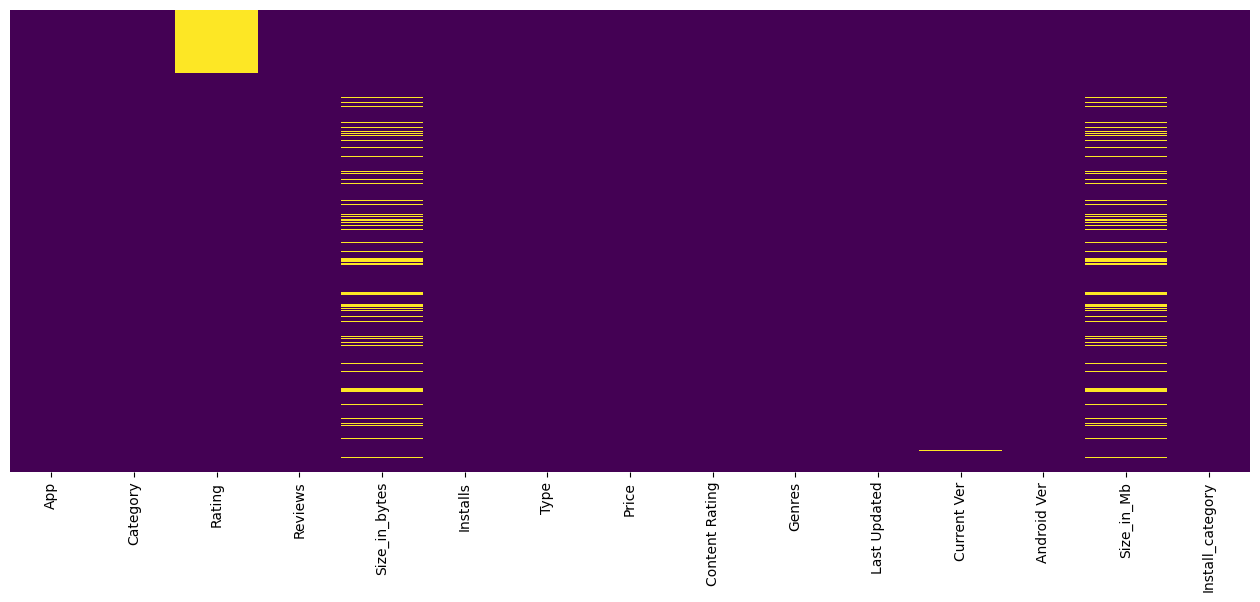

In [152]:
plt.figure(figsize= (16,6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Text(0.5, 1.0, 'Percentage of missing values in each column')

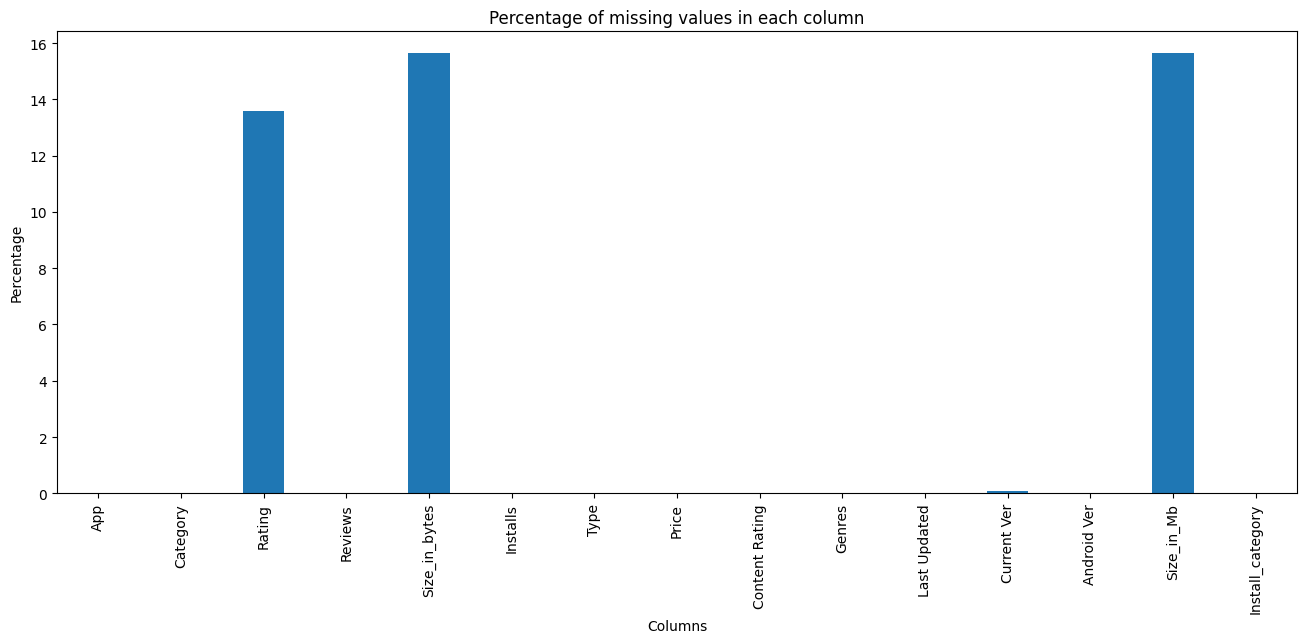

In [153]:
plt.figure(figsize=(16, 6))

missing_percentage = df.isnull().sum()/len(df)*100
missing_percentage.plot(kind = 'bar')

plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.title('Percentage of missing values in each column')

Text(0.5, 1.0, 'Percentage of missing values in each column without rating columns')

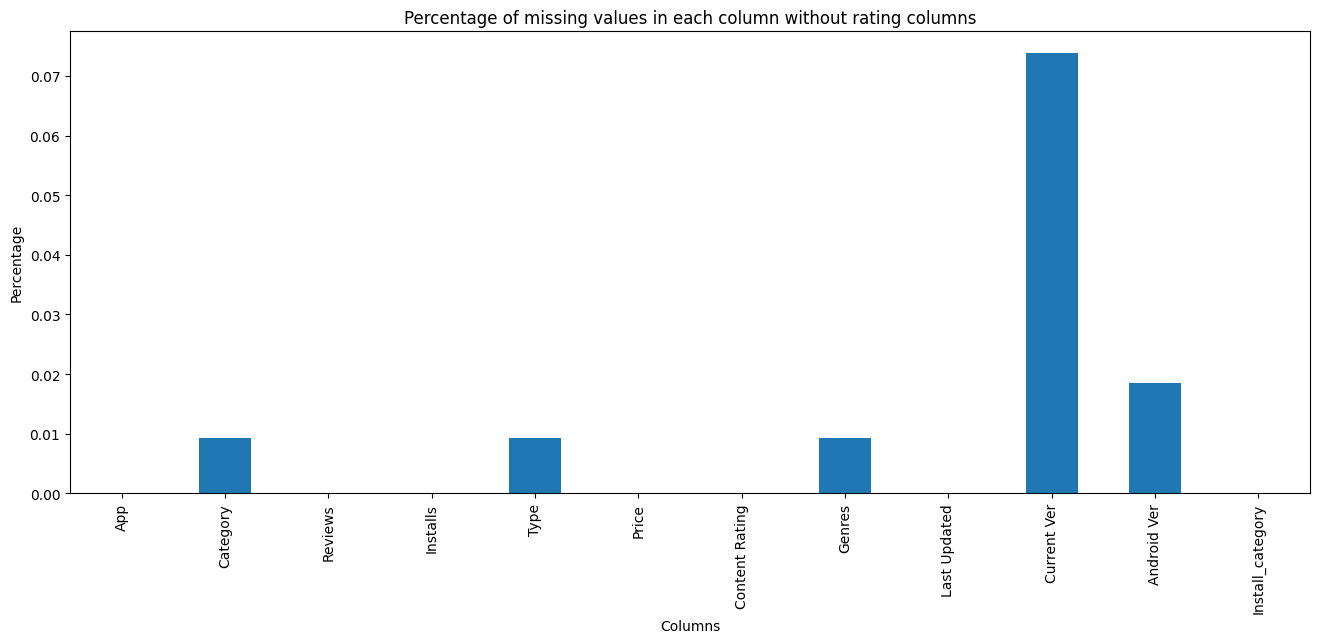

In [154]:
plt.figure(figsize= (16,6))
missing_percentage[missing_percentage < 1].plot(kind = 'bar')
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.title('Percentage of missing values in each column without rating columns')

In [155]:
df.isnull().sum().sort_values(ascending= False)

Size_in_bytes       1695
Size_in_Mb          1695
Rating              1474
Current Ver            8
Android Ver            2
Category               1
Type                   1
Genres                 1
App                    0
Reviews                0
Installs               0
Price                  0
Content Rating         0
Last Updated           0
Install_category       0
dtype: int64

OBSERVATIONS

- The 'Ratings' column is directly linked with the 'Installs' columns of the app 

In [156]:
df.describe()

,Rating,Reviews,Size_in_bytes,Installs,Price,Size_in_Mb
count,9367.000000,1.084100e+04,9.146000e+03,1.084100e+04,10841.000000,9146.000000
mean,4.191513,4.441119e+05,2.255921e+07,1.546291e+07,1.027273,21.514141
std,0.515735,2.927629e+06,2.368595e+07,8.502557e+07,15.948971,22.588679
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.000000,0.008301
25%,4.000000,3.800000e+01,5.138022e+06,1.000000e+03,0.000000,4.900000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,0.000000,13.000000
75%,4.500000,5.476800e+04,3.145728e+07,5.000000e+06,0.000000,30.000000
max,5.000000,7.815831e+07,1.048576e+08,1.000000e+09,400.000000,100.000000


In [159]:
df.groupby('Install_category')['Rating'].describe()

C:\Users\hp\AppData\Local\Temp\ipykernel_20324\3393785059.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Install_category')['Rating'].describe()


,count,mean,std,min,25%,50%,75%,max
Install_category,,,,,,,,
no,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
very low,81.0,4.637037,0.845199,1.0,4.8,5.0,5.0,5.0
low,1280.0,4.169375,0.827423,1.0,3.8,4.4,4.8,5.0
moderate,1442.0,4.035160,0.604533,1.4,3.8,4.2,4.5,5.0
more than moderate,3732.0,4.157958,0.440631,1.6,4.0,4.2,4.5,4.9
high,2004.0,4.287076,0.294902,2.0,4.1,4.3,4.5,4.9
very high,698.0,4.386533,0.192817,3.1,4.3,4.4,4.5,4.8
top notch,130.0,4.309231,0.186126,3.7,4.2,4.3,4.4,4.7


In [160]:
#Install_category which has null value of rating

df['Install_category'].loc[df['Rating'].isnull()].value_counts()

Install_category
low                   882
very low              454
moderate               89
more than moderate     34
no                     15
high                    0
very high               0
top notch               0
Name: count, dtype: int64

A BOXPLOT OF RATING IN EASCH INSTALL_CATEGORY

<Axes: xlabel='Install_category', ylabel='Rating'>

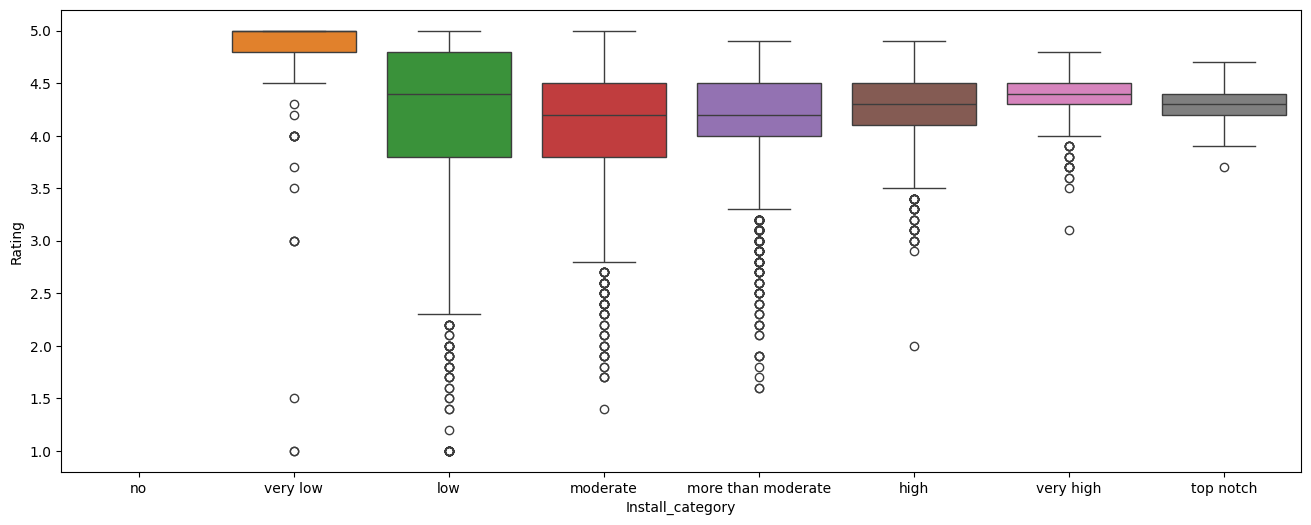

In [162]:
plt.figure(figsize=(16,6))
sns.boxplot(x='Install_category', y='Rating', hue='Install_category',data=df)

In [163]:
df['Install_category'].loc[df['Reviews'].isnull()].value_counts()

Install_category
no                    0
very low              0
low                   0
moderate              0
more than moderate    0
high                  0
very high             0
top notch             0
Name: count, dtype: int64

<Axes: xlabel='Install_category', ylabel='Reviews'>

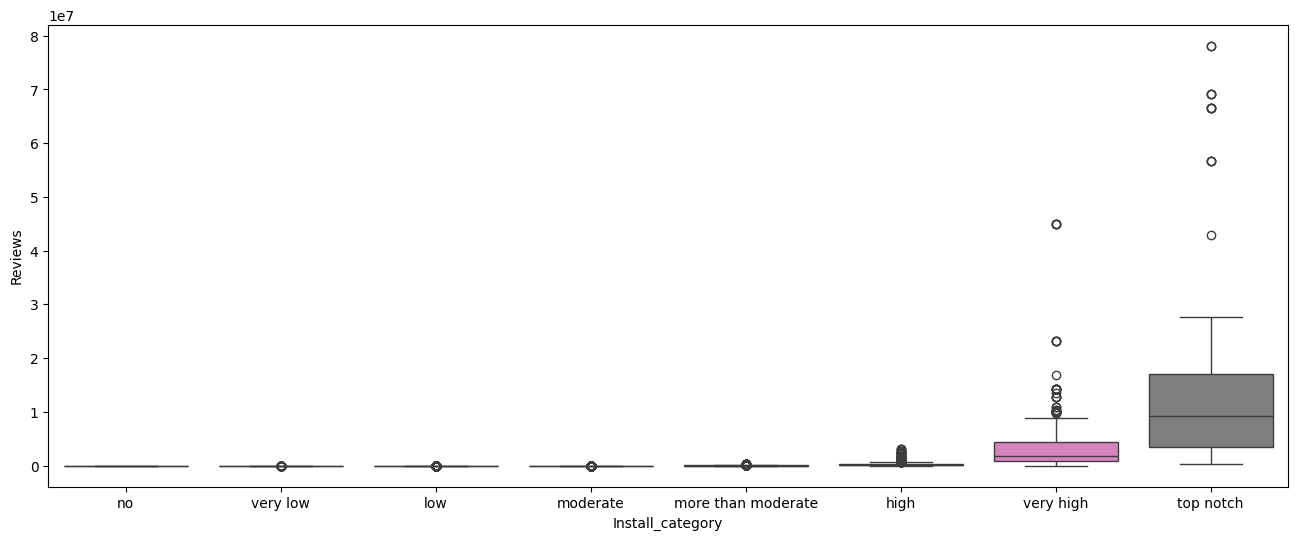

In [165]:
plt.figure(figsize=(16,6))
sns.boxplot(x='Install_category', y='Reviews', hue='Install_category', data=df)

<Axes: xlabel='Rating', ylabel='Reviews'>

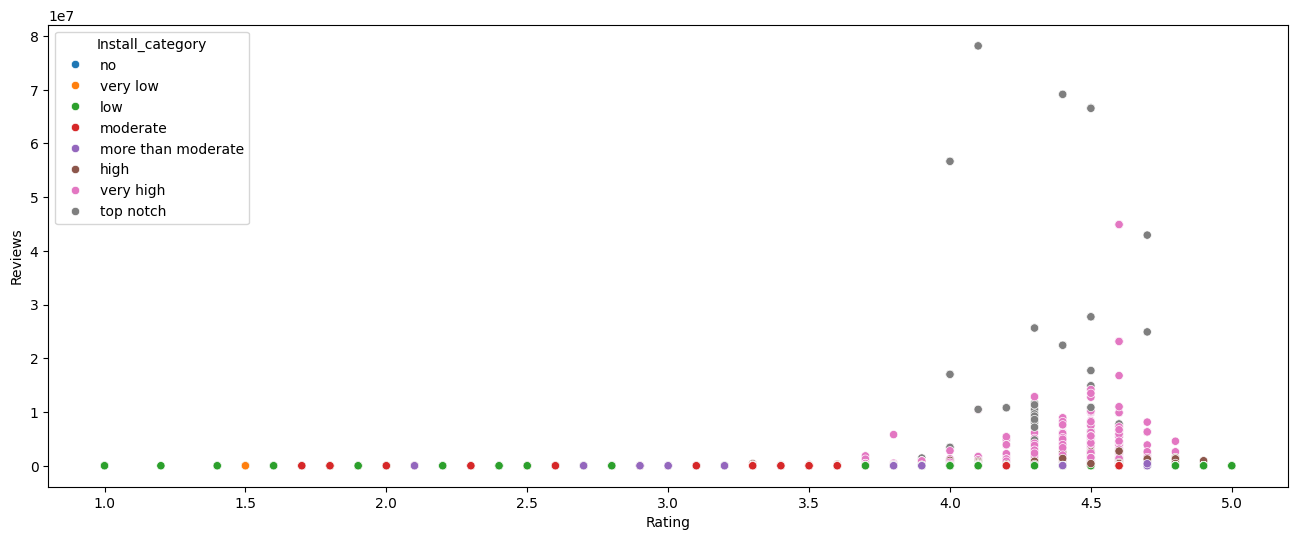

In [169]:
plt.figure(figsize=(16,6))
sns.scatterplot(x='Rating',y='Reviews',hue='Install_category',data=df)

<Axes: xlabel='Reviews', ylabel='Installs'>

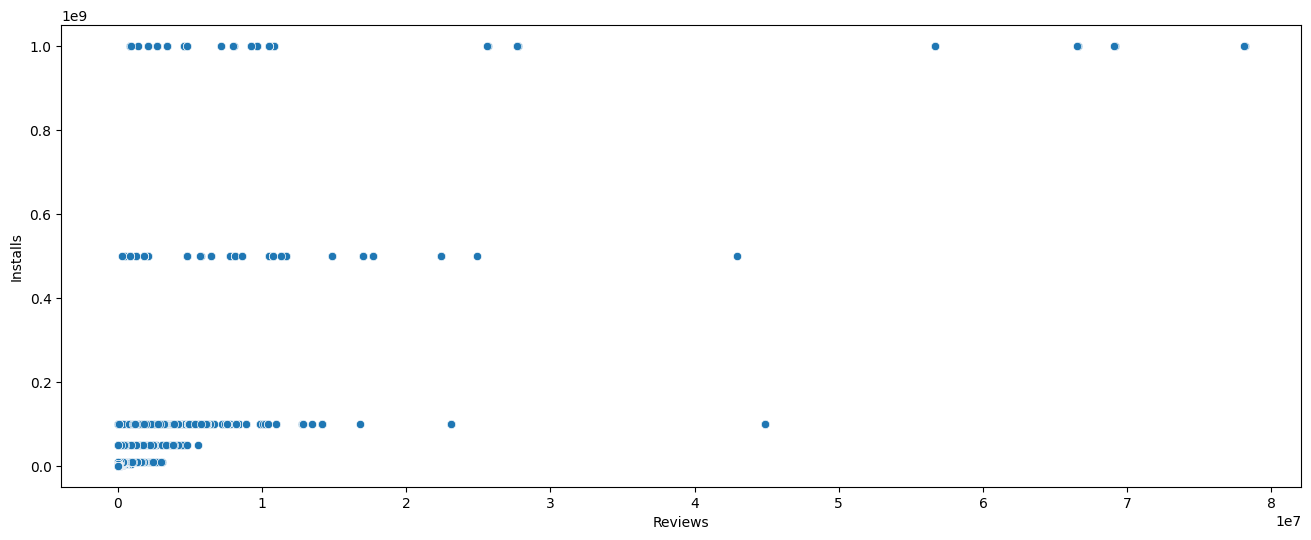

In [171]:
plt.figure(figsize=(16,6))
sns.scatterplot(x ='Reviews',y='Installs',data=df)

<Figure size 1600x600 with 0 Axes>

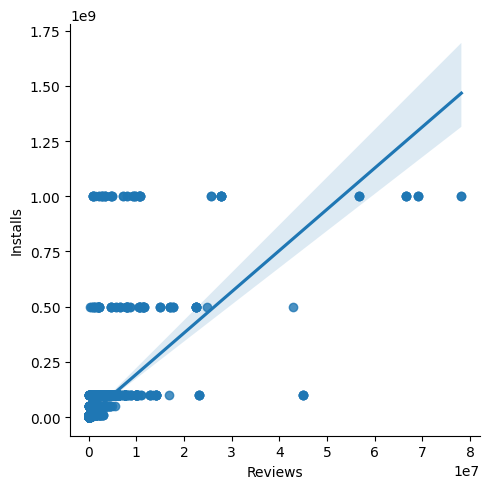

In [172]:
plt.figure(figsize=(16,6))
sns.lmplot(x='Reviews', y='Installs', data=df)

DEALING WITH DUPLICATES

In [174]:
df.duplicated().sum()

483

In [175]:
df['App'].duplicated().sum()

1181

In [176]:
for col in df.columns:
    print(f"Number of duplicates in {col} column are : {df[col].duplicated().sum()}")

Number of duplicates in App column are : 1181
Number of duplicates in Category column are : 10807
Number of duplicates in Rating column are : 10801
Number of duplicates in Reviews column are : 4840
Number of duplicates in Size_in_bytes column are : 10381
Number of duplicates in Installs column are : 10821
Number of duplicates in Type column are : 10838
Number of duplicates in Price column are : 10749
Number of duplicates in Content Rating column are : 10835
Number of duplicates in Genres column are : 10721
Number of duplicates in Last Updated column are : 9464
Number of duplicates in Current Ver column are : 8009
Number of duplicates in Android Ver column are : 10807
Number of duplicates in Size_in_Mb column are : 10381
Number of duplicates in Install_category column are : 10833


Find duplicates

In [ ]:
df[df['App'].duplicated(keep=False)].sort_values(by='App')

Remove duplicates

In [179]:
df.drop_duplicates(inplace=True)

In [180]:
print(f"Number of rows after dropping the duplicates are : {df.shape[0]}")

Number of rows after dropping the duplicates are : 10358


INSIGHTS FROM DATA

1. CATEGORY WITH HIGHEST NUMBER OF APPS

In [183]:
df['Category'].value_counts().head(10)

Category
FAMILY             1943
GAME               1121
TOOLS               843
BUSINESS            427
MEDICAL             408
PRODUCTIVITY        407
PERSONALIZATION     388
LIFESTYLE           373
COMMUNICATION       366
FINANCE             360
Name: count, dtype: int64

2. CATEGORY WITH HIGHEST INSTALLS

In [185]:
df.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10)

Category
GAME                  31544024415
COMMUNICATION         24152276251
SOCIAL                12513867902
PRODUCTIVITY          12463091369
TOOLS                 11452771915
FAMILY                10041692505
PHOTOGRAPHY            9721247655
TRAVEL_AND_LOCAL       6361887146
VIDEO_PLAYERS          6222002720
NEWS_AND_MAGAZINES     5393217760
Name: Installs, dtype: int64

3. CATEGORY WITH HIGHEST NUMBER OF REVIEWS

In [186]:
df.groupby('Category')['Reviews'].sum().sort_values(ascending=False).head(10)

Category
GAME               1415536650
COMMUNICATION       601273552
SOCIAL              533576829
FAMILY              396771969
TOOLS               273185044
PHOTOGRAPHY         204297410
VIDEO_PLAYERS       110380188
PRODUCTIVITY        102554498
SHOPPING             94931162
PERSONALIZATION      75193163
Name: Reviews, dtype: int64

4. CATEGORY WITH HIGHEST Mean RATING

In [188]:
df.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(10)

Category
EVENTS                 4.435556
EDUCATION              4.375969
ART_AND_DESIGN         4.358065
BOOKS_AND_REFERENCE    4.347458
PERSONALIZATION        4.333871
PARENTING              4.300000
GAME                   4.281285
BEAUTY                 4.278571
HEALTH_AND_FITNESS     4.261450
SOCIAL                 4.254918
Name: Rating, dtype: float64

<Axes: xlabel='Rating', ylabel='Density'>

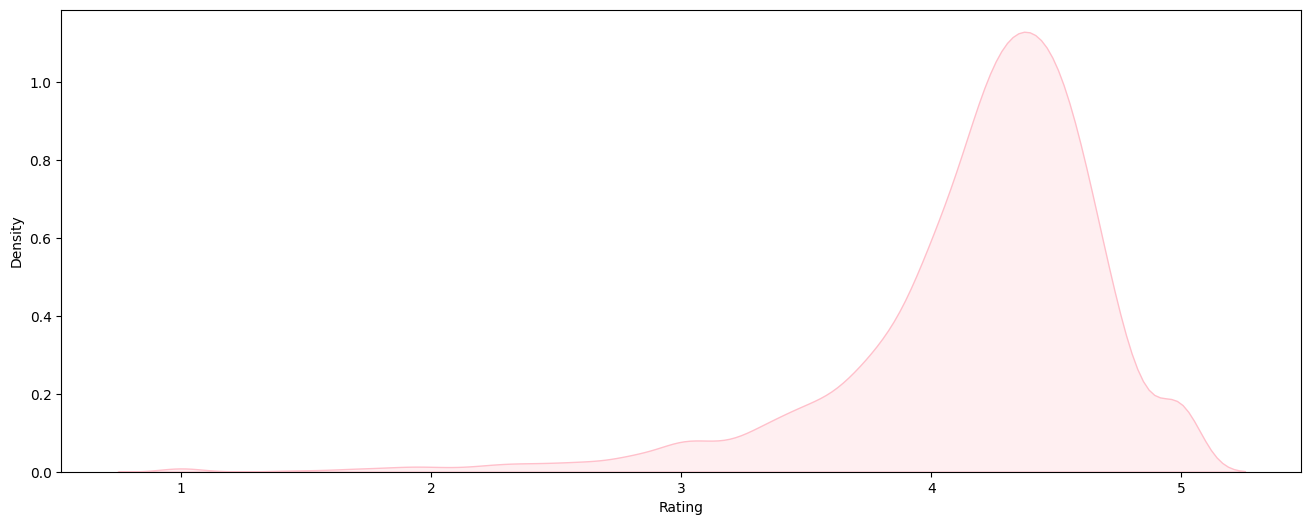

In [190]:
plt.figure(figsize=(16,6))
sns.kdeplot(df['Rating'], color="pink", fill = True)

5. BARPLOT FOR FREE AND PAID APPS

In [194]:
len(df)

10358

In [202]:
df['Price'].value_counts()

Price
0.00      9593
0.99       146
2.99       125
1.99        73
4.99        70
3.99        60
1.49        46
5.99        27
2.49        25
9.99        19
6.99        12
399.99      12
14.99        9
4.49         9
3.49         7
7.99         7
19.99        5
8.99         5
5.49         5
29.99        5
6.49         5
24.99        4
12.99        4
2.00         3
11.99        3
1.00         3
17.99        2
16.99        2
1.70         2
7.49         2
10.00        2
39.99        2
8.49         2
13.99        2
3.95         2
10.99        2
1.29         1
299.99       1
1.76         1
15.46        1
1.59         1
2.95         1
1.97         1
33.99        1
389.99       1
3.08         1
400.00       1
4.77         1
4.84         1
379.99       1
2.56         1
9.00         1
1.50         1
3.02         1
3.28         1
4.60         1
37.99        1
2.90         1
1.20         1
1.61         1
2.50         1
4.29         1
89.99        1
74.99        1
25.99        1
5.00         1
19.9

In [195]:
10358 - 9593

765

Text(1, 3.5, 'Paid apps:765')

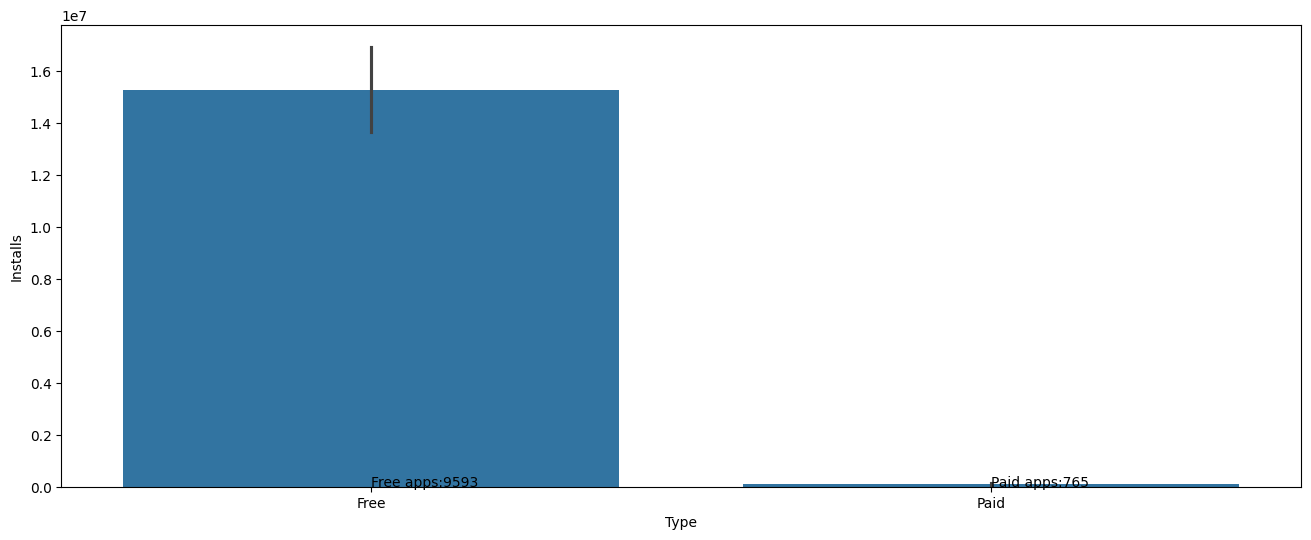

In [198]:
plt.figure(figsize=(16,6))
sns.barplot(x='Type', y='Installs',data=df)
plt.text(0, 3.5, 'Free apps:9593')
plt.text(1, 3.5, 'Paid apps:765')

6. TO CHECK THE RELATION OF INSTALLS ANS SIZE

<Axes: xlabel='Install_category', ylabel='Size_in_Mb'>

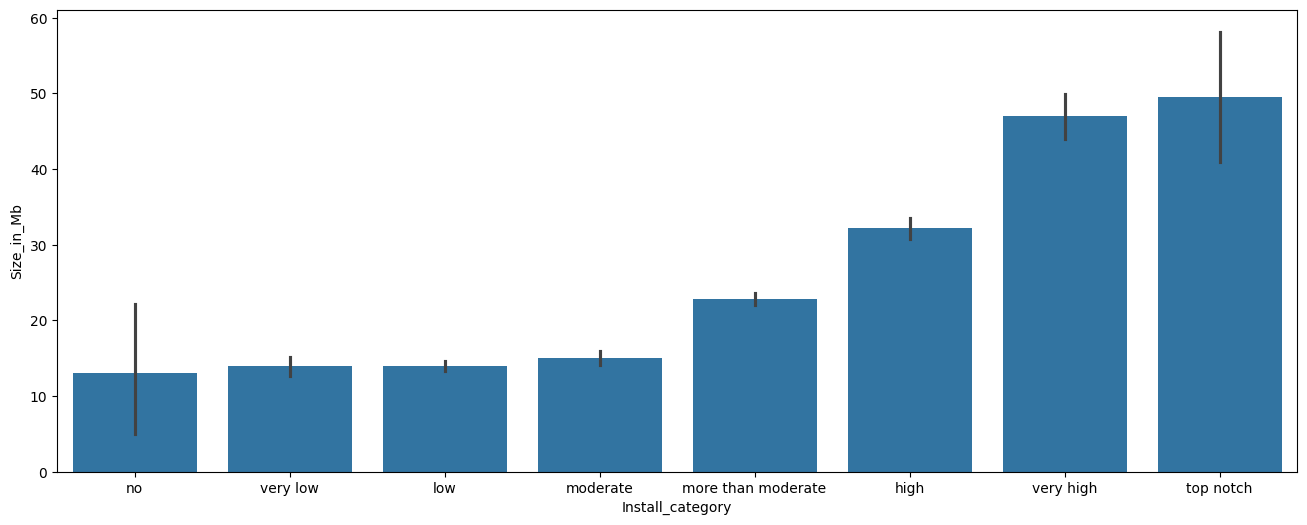

In [199]:
plt.figure(figsize=(16,6))
sns.barplot(x='Install_category', y='Size_in_Mb', data = df)

<Axes: xlabel='Install_category', ylabel='Reviews'>

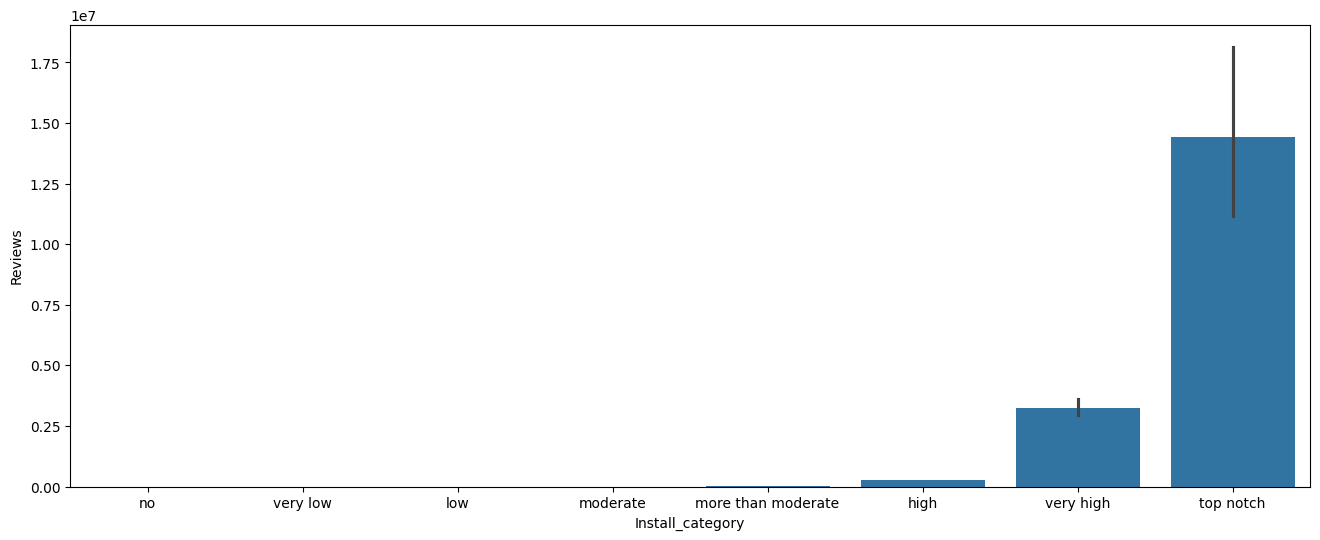

In [203]:
plt.figure(figsize=(16,6))
sns.barplot(x='Install_category', y='Reviews', data = df)

INSIGHTS:

- Apps under 'Games' and 'Communication' category are nost installed and reviewed.
- Amongst the given categories, 'Family' has most number of apps.
- Free apps are quite heavy in size as compared to free apps.
- Apps under 'EVENTS' category have most ratings of about 4.4
- Apps with more installations tend to have bigger size
- Users tend to download apps with more reviews